# 911 Calls Exploratory Analysis

#### The database is a record of all records the emergency 911 calls over an interval of time. each call is recorded as an instance while recording features of each call. The features are broken down as follows:

##### These two features represent the location as identified by the Opearator

1. lat : String variable, Latitude

2. lng: String variable, Longitude

3. desc: String variable, Description of the Emergency Call, reason and nature of emergency

4. zip: String variable, Zipcode of the reporter as provided by the caller

5. title: String variable, Title

6. timeStamp: String variable, YYYY-MM-DD HH:MM:SS

7. twp: String variable, Township

8. addr: String variable, Address

9. e: String variable, Dummy variable (always 1)

## Data and Set Up

In [ ]:
# Import libraries
import numpy as np
import pandas as pd

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data
df = pd.read_csv('911.csv')

# Check dataframe info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.lat = df.lat.astype('float16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float16
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float16(1), float64(2), int64(1), object(5)
memory usage: 6.3+ MB


In [ ]:
df.twp = df.twp.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   lat        99492 non-null  float16 
 1   lng        99492 non-null  float64 
 2   desc       99492 non-null  object  
 3   zip        86637 non-null  float64 
 4   title      99492 non-null  object  
 5   timeStamp  99492 non-null  object  
 6   twp        99449 non-null  category
 7   addr       98973 non-null  object  
 8   e          99492 non-null  int64   
dtypes: category(1), float16(1), float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [ ]:
# Check first 5 entries
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.3125,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.2500,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.1250,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.1250,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.2500,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
#check descr column
df.desc

,desc
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...
...,...
99487,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...
99488,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...
99489,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...
99490,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...


## Basic Questions

In [ ]:
#check columns
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [ ]:
df.rename(columns={'zipcode':'zip'},inplace=True)


In [ ]:
df.rename(columns={'zip':'zipcode'})

,lat,lng,desc,zipcode,title,timeStamp,twp,addr,e
0,40.31250,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.25000,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.12500,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.12500,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.25000,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.12500,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.00000,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.12500,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.18750,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [ ]:
# if we want to change names of all column then assign new list to df.columns
#df.columns = new_list
new_columns=['rrr', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']
df.columns=new_columns

In [ ]:
#check unique zip
df.zip.unique()

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 18103., 17752., 19111., 18927., 19435., 18951.,
       19472., 19503., 19126., 19505., 19423., 19138., 36107., 18036.,
       19116., 19139., 19129., 19115., 19355., 77316., 19457., 19082.,
       19127.])

In [ ]:
#check nan value
df.zip.isna().sum()

12855

In [ ]:
# plot nan values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', annot=True, fmt='d')

plt.title("NaN Values Heatmap")
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78a6301bc220> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#Assignment:
#1. Fill missing data of zip
#2. Convert zip column to int dtype

round(df.zip.mean())

19238

In [ ]:
df['zip']=df['zip'].fillna(19238)

In [ ]:
df.zip=df.zip.astype(int)

**What are the top 5 zipcodes for 911 calls?**

In [ ]:
zipcode_counts = df['zip'].value_counts()
top_5_zipcodes = zipcode_counts.head(5)

## ** What are the top 5 townships(twp) for 911 calls?**

In [ ]:
twp_counts=df['tmp'].value_counts()
top_5_twp=twp_counts.head(5)

KeyError: 'tmp'

## ** How many unique title codes are there?**

In [ ]:
df.title.unique()

## Creating New Features

** In the title column there are 'Reasons/Departments' specified before the title code.  These are EMS, Fire, and Traffic.   
Use .apply() with a custom lambda expression to create a new column called 'Reason' that contains this string value.**

In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df

,rrr,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.31250,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.25000,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.12500,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.12500,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.25000,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19238,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.12500,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.00000,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.12500,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.18750,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


## ** What is the most common reason for a 911 call based off this new column?**

In [ ]:
value_counts = df['Reason'].value_counts()
most_common_reason = value_counts.idxmax()
count = value_counts.max()

count

48877

# ** Use seaborn to create a countplot of 911 calls by Reason**

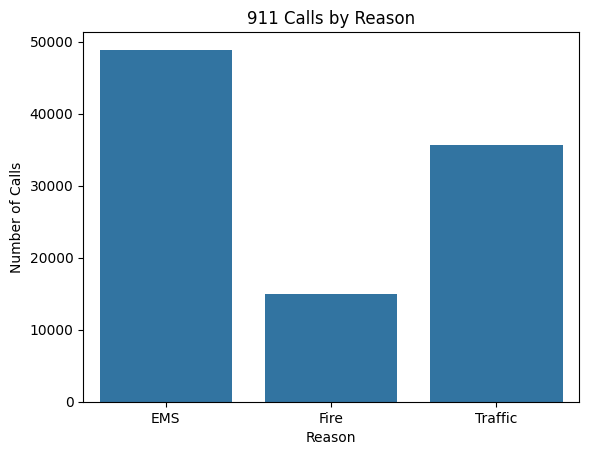

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Reason')
plt.title('911 Calls by Reason')
plt.xlabel('Reason')
plt.ylabel('Number of Calls')
plt.show()


## ** What is the data type of the objects in the timeStamp column?**

In [ ]:
data_type = df['timeStamp'].dtype
print(data_type)

object


## ** Convert timeStamp from strings to DateTime object**

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.timeStamp

,timeStamp
0,2015-12-10 17:40:00
1,2015-12-10 17:40:00
2,2015-12-10 17:40:00
3,2015-12-10 17:40:01
4,2015-12-10 17:40:01
...,...
99487,2016-08-24 11:06:00
99488,2016-08-24 11:07:02
99489,2016-08-24 11:12:00
99490,2016-08-24 11:17:01


# Create new columns like Month, Day of Week

In [ ]:
df['Month'] = df['timeStamp'].dt.month

df['Day of Week'] = df['timeStamp'].dt.dayofweek


**Use seaborn to create a countplot of the Month column with the hue based off the Reason column**

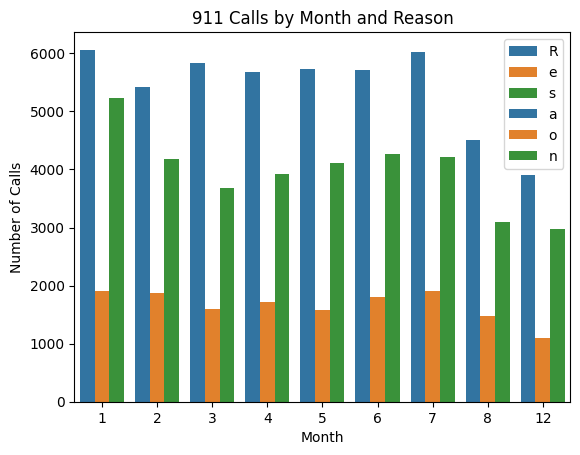

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Month', hue='Reason')
plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.legend('Resaon')
plt.show()



**Create a simple plot off of the dataframe indicating the count of calls per month**

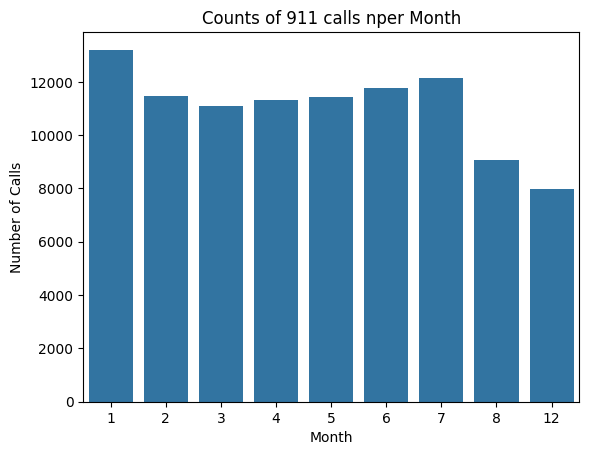

In [ ]:
monthly_counts=df['Month'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index,y=monthly_counts.values)
plt.title('Counts of 911 calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

**Use seaborn's lmplot() to create a linear fit on the number of calls per Month. Keep in mind you may need to reset the index to a column.**



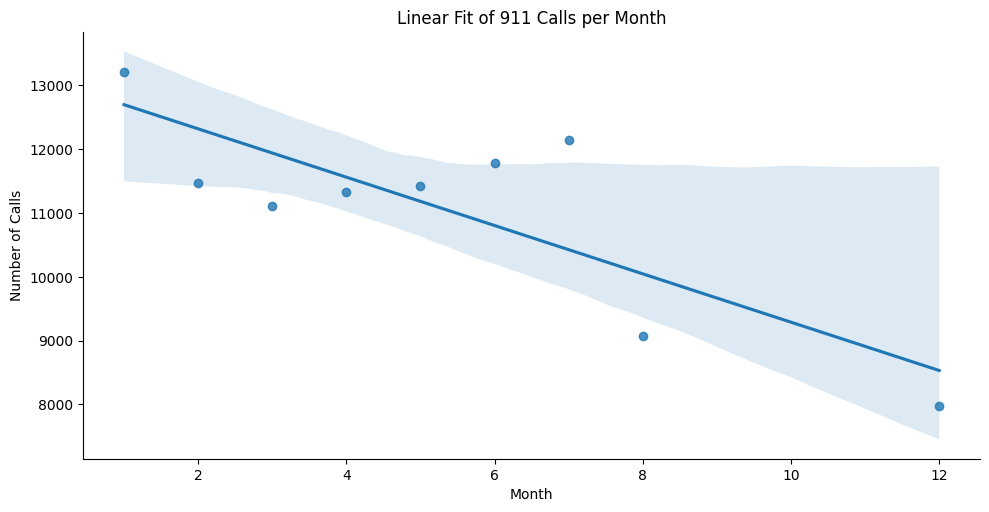

In [ ]:
monthly_counts = df['Month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['Month', 'Number of Calls']

sns.lmplot(x='Month', y='Number of Calls', data=monthly_counts, aspect=2)

plt.title('Linear Fit of 911 Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

**Use apply along with the .date() method to create a new column called 'Date' that contains the date from the timeStamp column.**

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date() if isinstance(x, pd.Timestamp) else None)

**Grouby the Date column with the count() aggregate and create a plot of counts of 911 calls**

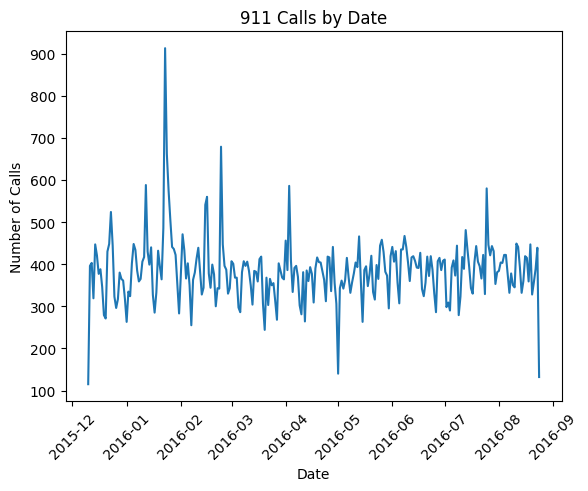

In [ ]:
daily_counts = df.groupby('Date').size().reset_index(name='Number of Calls')

sns.lineplot(x='Date', y='Number of Calls', data=daily_counts)

plt.title('911 Calls by Date')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

** Recreate plot above but create 3 separate plots representing reason for the 911 Call**

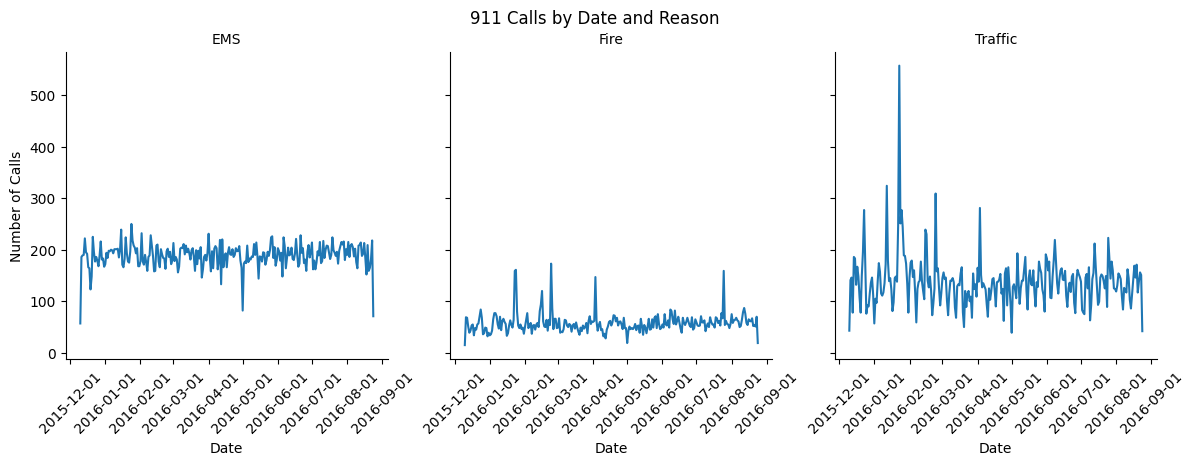

In [ ]:
daily_reason_counts = df.groupby(['Date', 'Reason']).size().reset_index(name='Number of Calls')

g = sns.FacetGrid(daily_reason_counts, col='Reason', col_wrap=3, height=4)
g.map(sns.lineplot, 'Date', 'Number of Calls')

g.set_axis_labels('Date', 'Number of Calls')
g.set_titles(col_template='{col_name}')
g.set_xticklabels(rotation=45)

plt.suptitle('911 Calls by Date and Reason', y=1.02)
plt.show()